In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("cancer.csv")

In [3]:
df.head()

,id,thickness,cell_size,cell_shape,adhesion,epith_cell_size,nuclei,chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.tail()

,id,thickness,cell_size,cell_shape,adhesion,epith_cell_size,nuclei,chromatin,nucleoli,mitoses,class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [5]:
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [6]:
df.isnull().sum()

id                 0
thickness          0
cell_size          0
cell_shape         0
adhesion           0
epith_cell_size    0
nuclei             0
chromatin          0
nucleoli           0
mitoses            0
class              0
dtype: int64

In [7]:
data = df.drop('id', axis=1)

In [8]:
data.head()

,thickness,cell_size,cell_shape,adhesion,epith_cell_size,nuclei,chromatin,nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [9]:
data.describe()

,thickness,cell_size,cell_shape,adhesion,epith_cell_size,chromatin,nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


<Axes: xlabel='class', ylabel='Count'>

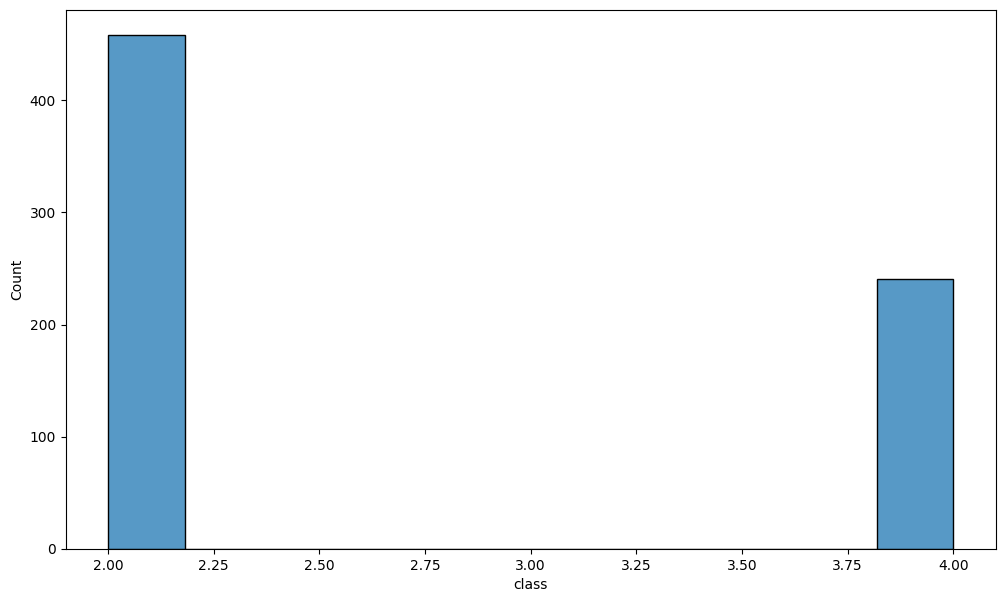

In [10]:
plt.figure(figsize=(12,7))
sns.histplot(data, x='class')

<Axes: xlabel='thickness', ylabel='Count'>

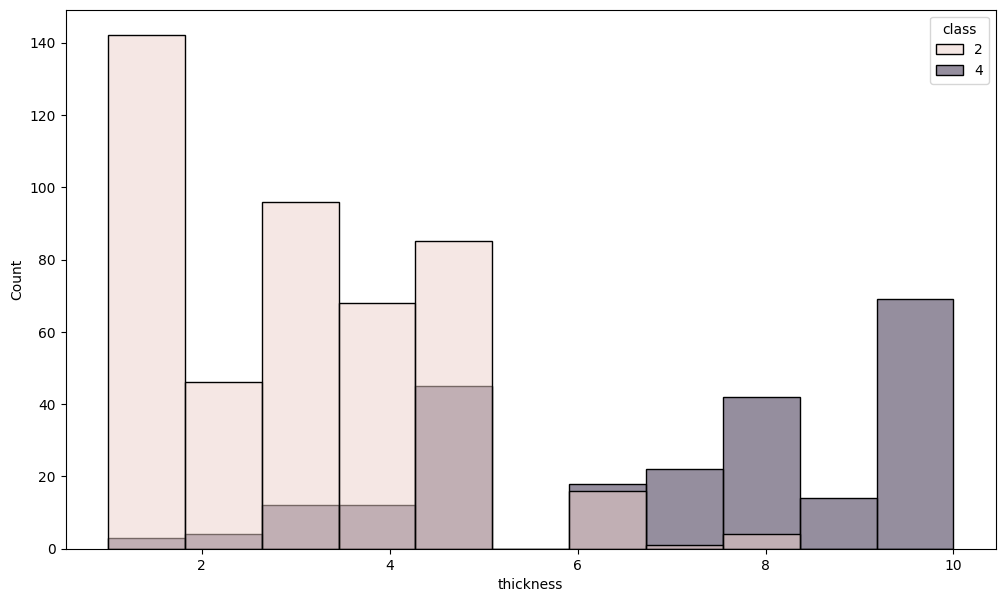

In [11]:
plt.figure(figsize=(12,7))
sns.histplot(data, x='thickness', hue='class')

<Axes: xlabel='cell_size', ylabel='Count'>

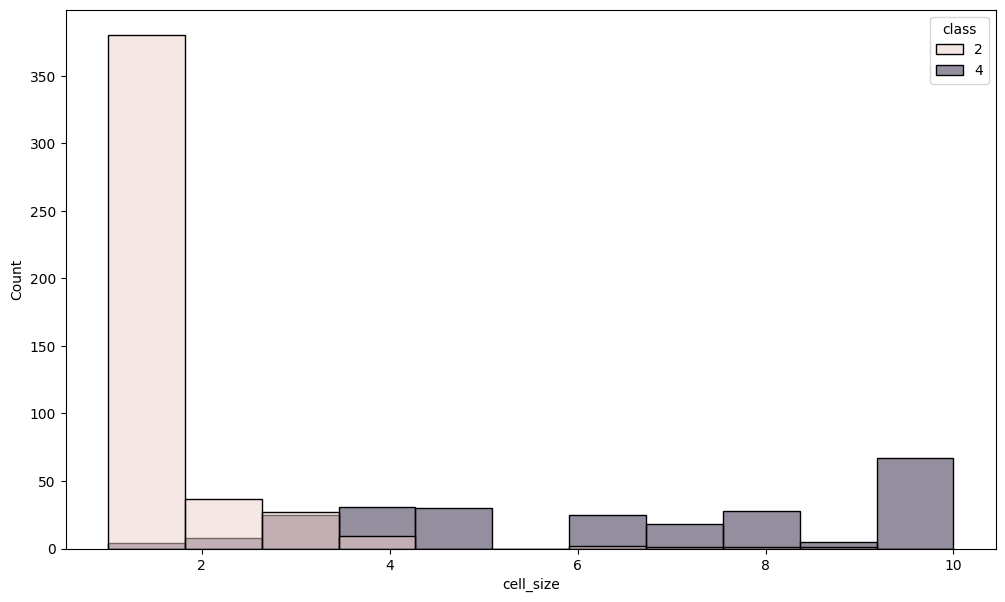

In [12]:
plt.figure(figsize=(12,7))
sns.histplot(data, x='cell_size', hue='class')

<Axes: xlabel='cell_shape', ylabel='Count'>

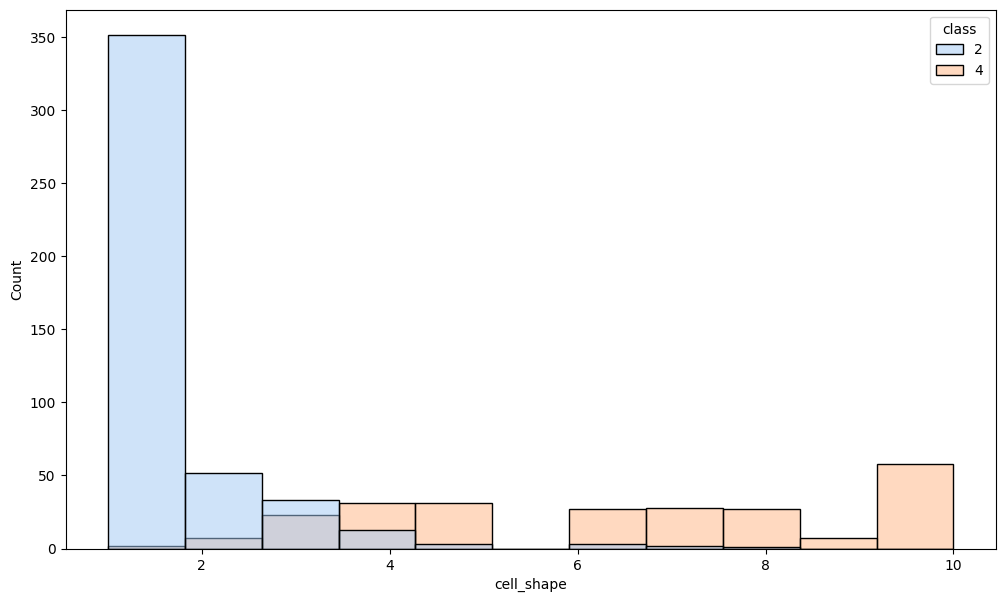

In [13]:
plt.figure(figsize=(12,7))
sns.histplot(data, x='cell_shape', hue='class', palette='pastel')

In [14]:
correlation = data.corr()
correlation['class']

/tmp/ipykernel_9622/3307152970.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


thickness          0.716001
cell_size          0.817904
cell_shape         0.818934
adhesion           0.696800
epith_cell_size    0.682785
chromatin          0.756616
nucleoli           0.712244
mitoses            0.423170
class              1.000000
Name: class, dtype: float64

<Axes: >

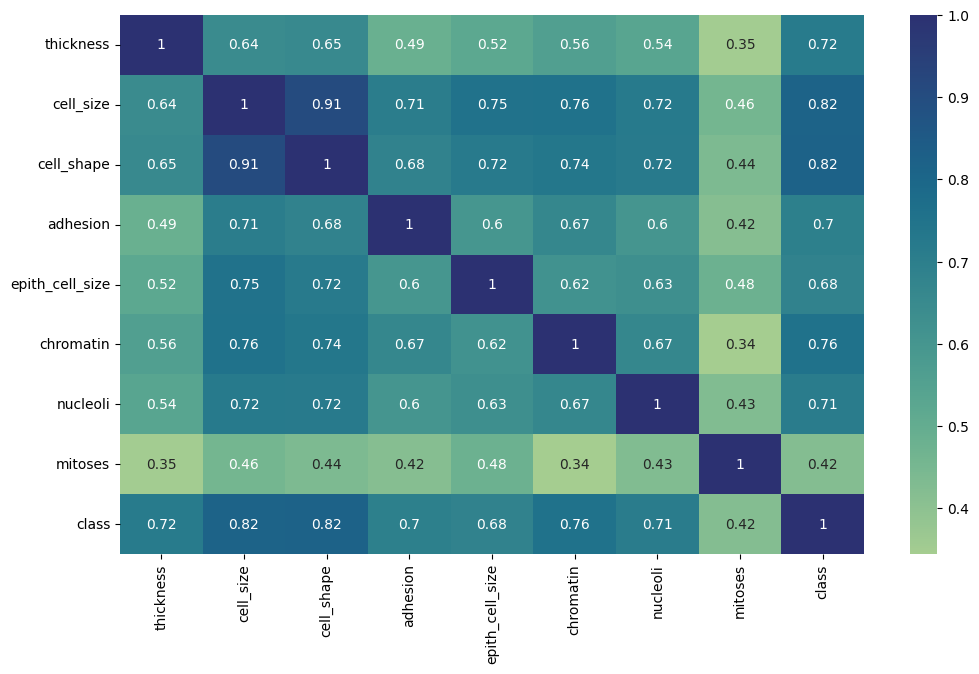

In [15]:
plt.figure(figsize=(12,7))
sns.heatmap(correlation, annot=True, cmap='crest')

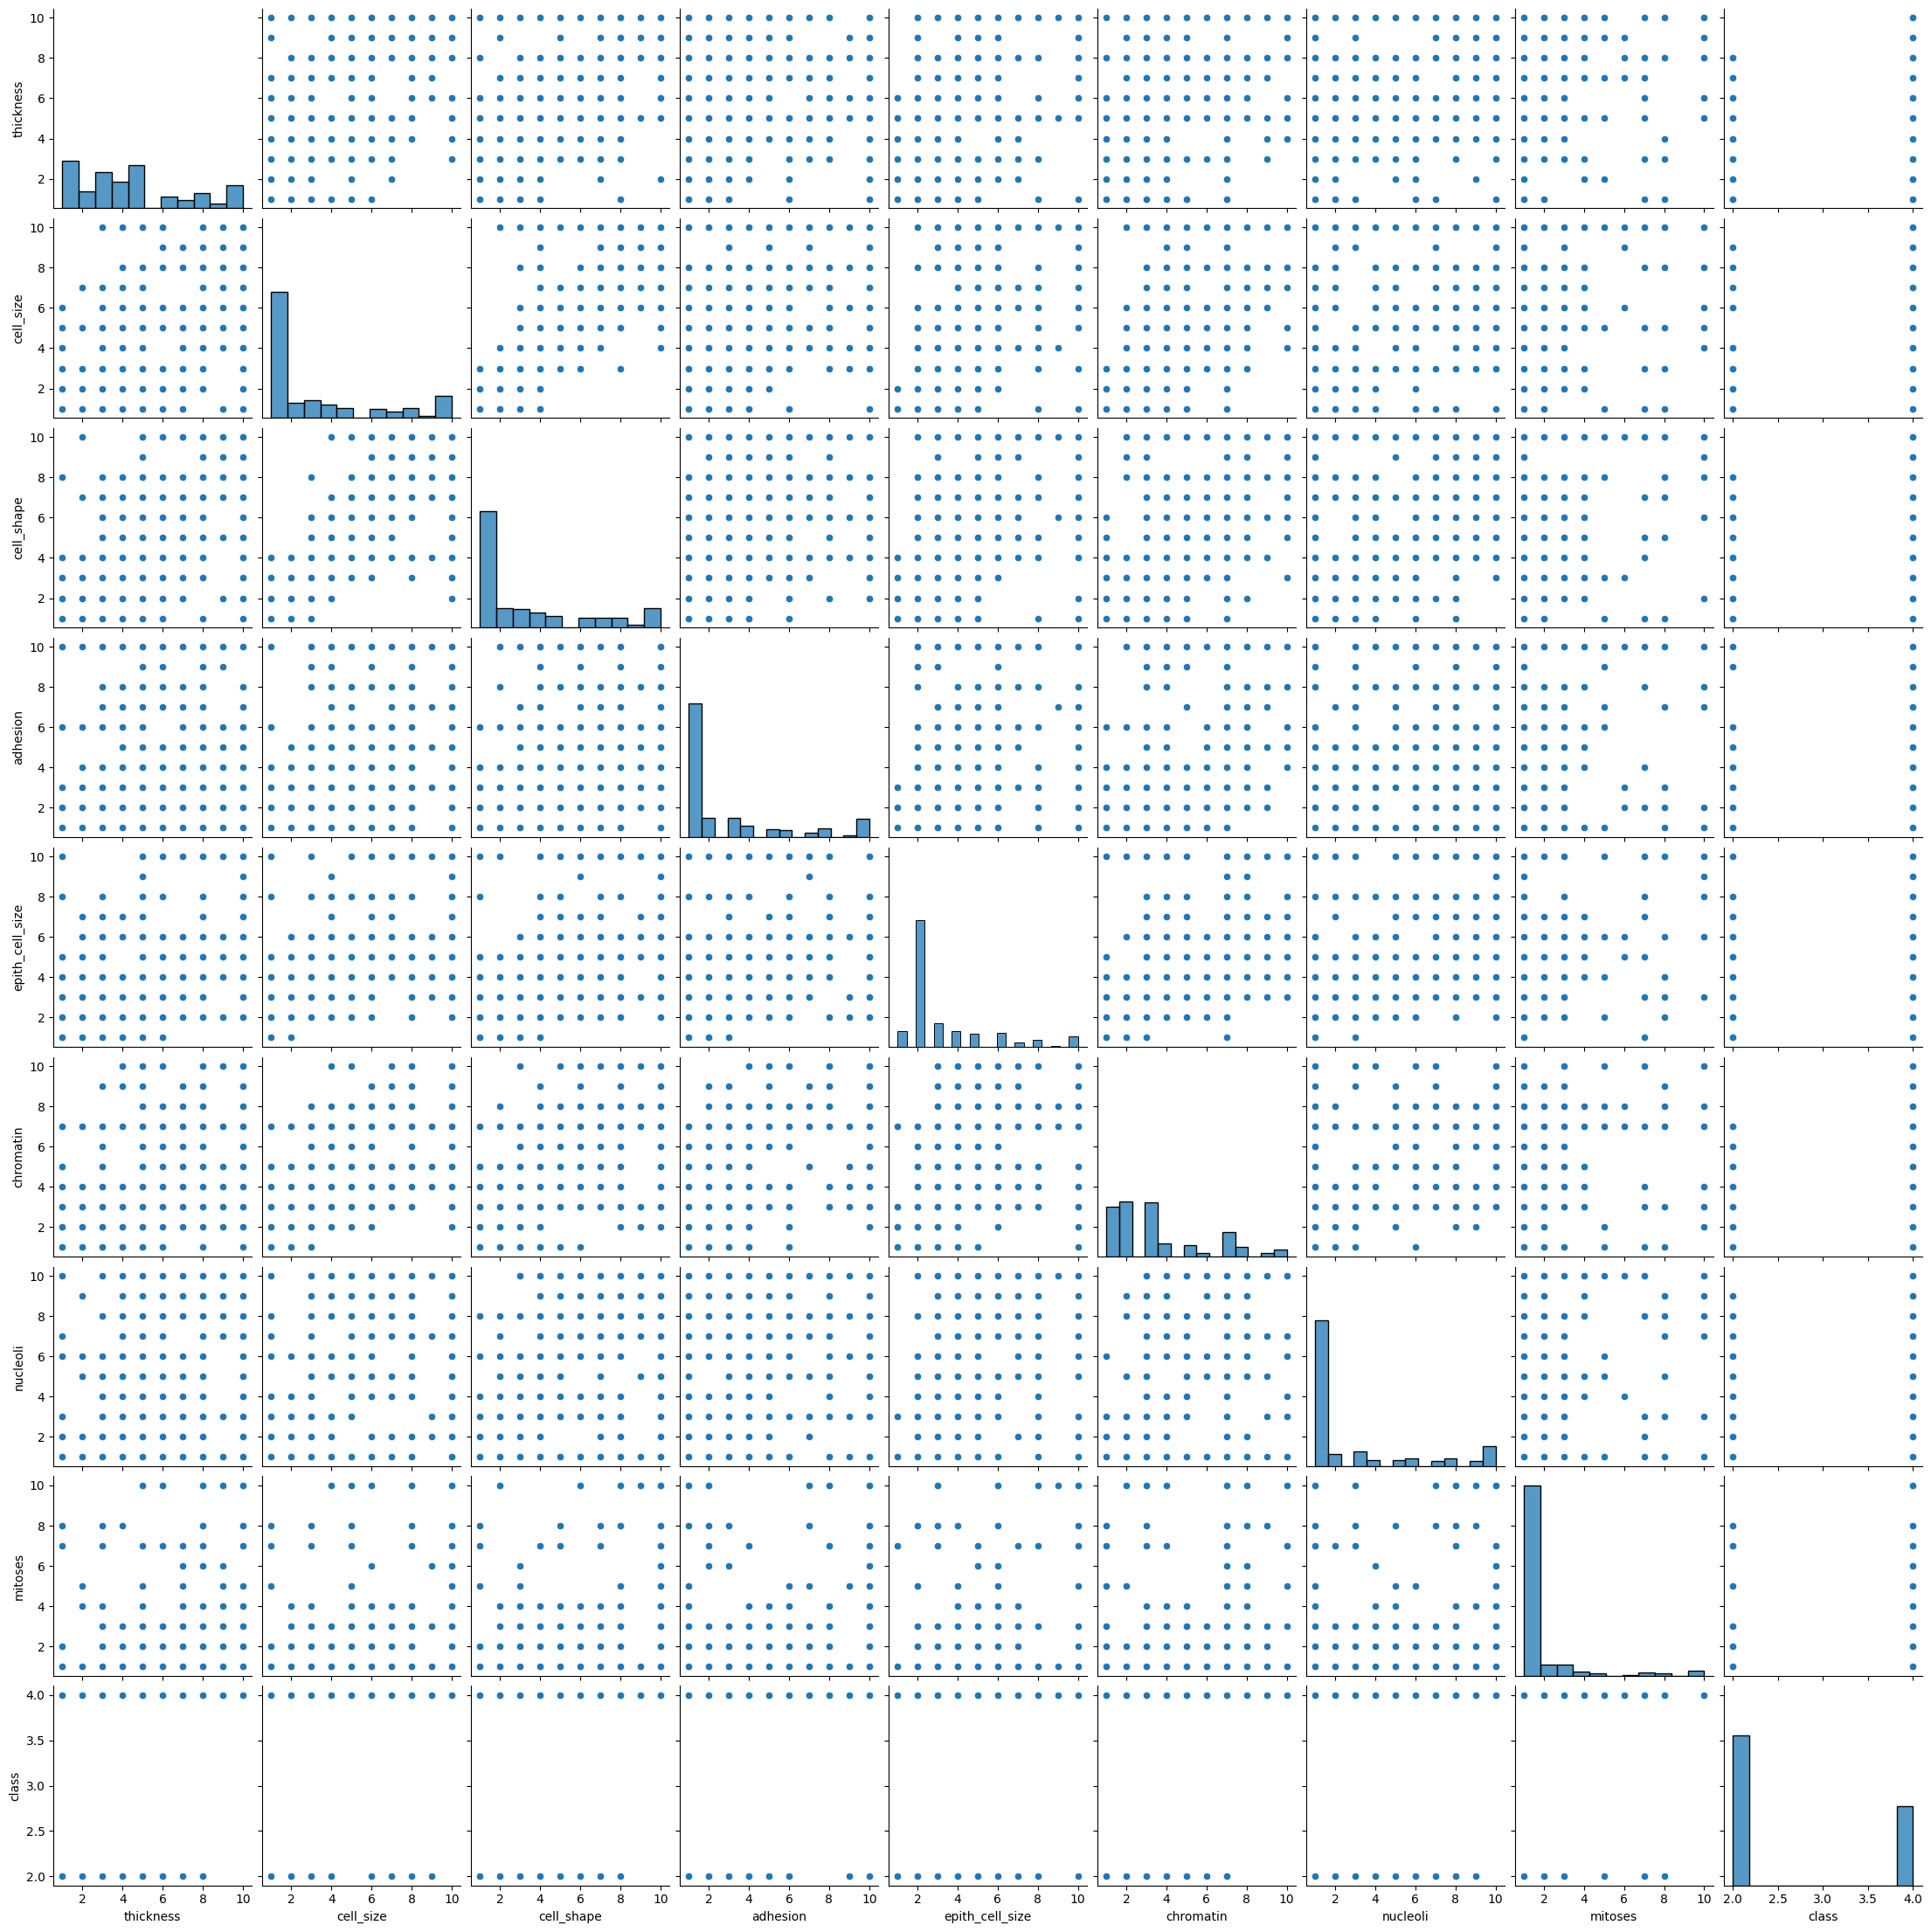

In [16]:
sns.pairplot(data)

In [17]:
data.select_dtypes(exclude=[float,int]).columns

Index(['nuclei'], dtype='object')

In [18]:
data.eq("?").sum()

thickness           0
cell_size           0
cell_shape          0
adhesion            0
epith_cell_size     0
nuclei             16
chromatin           0
nucleoli            0
mitoses             0
class               0
dtype: int64

In [19]:
data['nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: nuclei, dtype: int64

In [20]:
data.select_dtypes(exclude=[float,int]).columns

Index(['nuclei'], dtype='object')

In [21]:
data.nuclei.replace("?", 1, inplace=True)

In [22]:
data.eq("?").sum()

thickness          0
cell_size          0
cell_shape         0
adhesion           0
epith_cell_size    0
nuclei             0
chromatin          0
nucleoli           0
mitoses            0
class              0
dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [24]:
train_feats = train_data.drop('class', axis=1)
train_labels = train_data['class']
test_feats = test_data.drop('class', axis=1)
test_labels = test_data['class']


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

my_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

In [26]:
train_feats_prep = my_pipeline.fit_transform(train_feats)

In [27]:
train_feats_prep

array([[0.44444444, 0.11111111, 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       [0.44444444, 0.22222222, 0.22222222, ..., 0.22222222, 0.33333333,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       ...,
       [0.77777778, 0.33333333, 0.66666667, ..., 0.22222222, 0.88888889,
        0.11111111],
       [1.        , 0.77777778, 1.        , ..., 0.44444444, 0.        ,
        0.        ],
       [0.33333333, 0.        , 0.11111111, ..., 0.22222222, 0.        ,
        0.        ]])

In [92]:
# from sklearn.linear_model import LogisticRegression
# log_model_sc = LogisticRegression()
# log_model_sc


# from sklearn.linear_model import RidgeClassifier
# ridge_model = RidgeClassifier()
# ridge_model

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model

# from sklearn.ensemble import RandomForestClassifier
# rf_model = RandomForestClassifier()
# rf_model

# from sklearn.svm import LinearSVC,SVC
# mod_lin_svc = LinearSVC()


DecisionTreeClassifier()

In [93]:
# log_model_sc.fit(train_feats_prep, train_labels)
# ridge_model.fit(train_feats, train_labels)
dt_model.fit(train_feats, train_labels)
# rf_model.fit(train_feats, train_labels)
# mod_lin_svc.fit(train_feats,train_labels)

DecisionTreeClassifier()

In [94]:
import warnings
warnings.filterwarnings('ignore')

In [95]:
train_labels_pred = dt_model.predict(train_feats_prep)
# train_labels_pred = log_model_sc.predict(train_feats)
# train_labels_pred = rf_model.predict(train_feats)
# train_labels_pred = mod_lin_svc.predict(train_feats)

In [96]:
from sklearn.metrics import accuracy_score

accuracy_score(train_labels, train_labels_pred)

0.6493738819320215

In [97]:
from sklearn.metrics import classification_report

print(classification_report(train_labels, train_labels_pred))

              precision    recall  f1-score   support

           2       0.65      1.00      0.79       363
           4       0.00      0.00      0.00       196

    accuracy                           0.65       559
   macro avg       0.32      0.50      0.39       559
weighted avg       0.42      0.65      0.51       559



Accuracy of Logistic Regression <b>0.35</b><br>
Accuracy of Ridge Classifier is <b>0.65</b><br>
Accuracy of Decision Tree Classifier is <b>0.65</b><br>
Accuracy of Linear SVC is <b>0.97</b><br>


In [88]:
test_feats_prep = my_pipeline.fit_transform(test_feats)

In [89]:
test_labels_pred = ridge_model.predict(test_feats)

In [90]:
accuracy_score(test_labels, test_labels_pred)

0.9571428571428572

In [91]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, test_labels_pred))

              precision    recall  f1-score   support

           2       0.95      0.99      0.97        95
           4       0.98      0.89      0.93        45

    accuracy                           0.96       140
   macro avg       0.96      0.94      0.95       140
weighted avg       0.96      0.96      0.96       140



Accuracy of Logistic Regression is <b>0.32</b><br>
Accuracy of Ridge Classifier is <b>0.96</b><br>
Accuracy of Linear SVC is <b>0.96</b><br>